In [152]:
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold



from sklearn.metrics import f1_score

In [2]:
dataset = pd.read_csv('../raw_data/enriched_CT_PM.csv')

In [3]:
data = dataset[['pm_abstracts', 'Authorisation status']].dropna()

In [4]:
pm_abstracts = data['pm_abstracts']

In [5]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 50)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [6]:
vectorized.head()

,acid,acute,adjusted,adults,advanced,arm,bone,cancer,cardiovascular,children,...,scores,serum,stage,survival,syndrome,toxicity,tumor,twice,weight,women
0,0.000000,0.010742,0.032978,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.055853,0.000000,0.000000,0.000000,0.000000,0.074490,0.000000,0.078265,0.000000,0.034118
1,0.064884,0.122459,0.000000,0.638380,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.031837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.011392,0.000000,0.016502,0.010675,0.000000,0.050761,0.000000,0.00000,0.086780,0.0,...,0.000000,0.000000,0.005506,0.000000,0.101249,0.000000,0.000000,0.000000,0.027406,0.034146
3,0.001575,0.007434,0.016736,0.001476,0.155826,0.099839,0.005828,0.61128,0.001846,0.0,...,0.004638,0.002953,0.176646,0.540706,0.001556,0.293833,0.103663,0.017022,0.004548,0.050370
4,0.011392,0.000000,0.016502,0.010675,0.000000,0.050761,0.000000,0.00000,0.086780,0.0,...,0.000000,0.000000,0.005506,0.000000,0.101249,0.000000,0.000000,0.000000,0.027406,0.034146


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=2)

In [9]:
y_pred = kmeans.fit_predict(vectorized)

In [10]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [12]:
y_pred.sum()

260

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(data['Authorisation status'], y_pred)

array([[868, 246],
       [ 31,  14]], dtype=int64)

In [18]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(vectorized)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

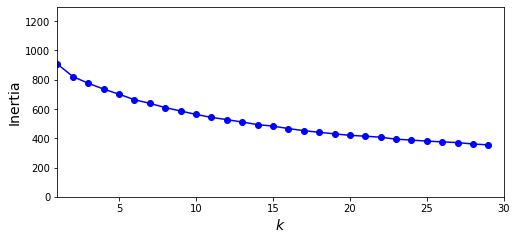

In [20]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 30, 0, 1300])
plt.show()

In [21]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 25)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [22]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(vectorized)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

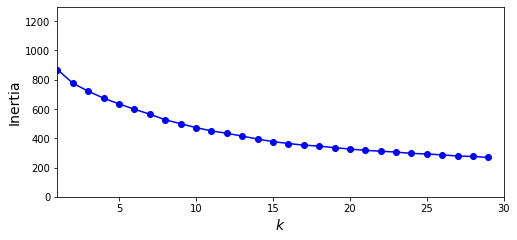

In [23]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 30, 0, 1300])
plt.show()

In [24]:
kmeans = KMeans(n_clusters=2)

In [25]:
y_pred = kmeans.fit_predict(vectorized)

In [26]:
confusion_matrix(data['Authorisation status'], y_pred)

array([[863, 251],
       [ 32,  13]], dtype=int64)

In [27]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 100)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [28]:
kmeans = KMeans(n_clusters=2)

In [29]:
y_pred = kmeans.fit_predict(vectorized)

In [30]:
confusion_matrix(data['Authorisation status'], y_pred)

array([[865, 249],
       [ 30,  15]], dtype=int64)

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(vectorized)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

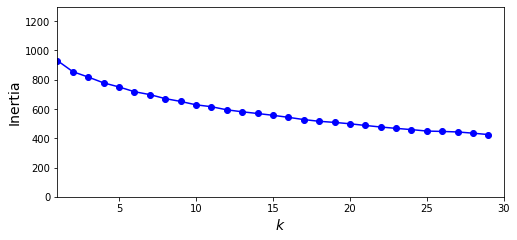

In [32]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 30, 0, 1300])
plt.show()

In [33]:
pca = PCA(n_components = 2)

In [35]:
X2D = pca.fit_transform(vectorized.astype('float64'))

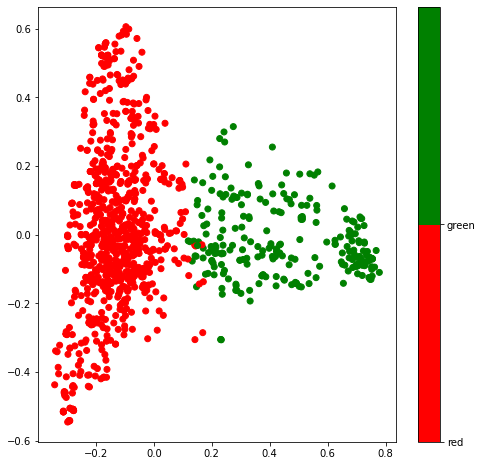

In [38]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X2D.T[0], X2D.T[1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_pred),max(y_pred)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

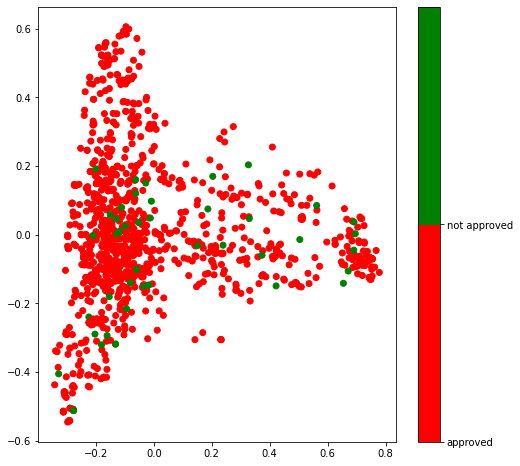

In [41]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X2D.T[0], X2D.T[1], c=data['Authorisation status'], cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_pred),max(y_pred)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(['approved', 'not approved'])

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(vectorized.astype('float64'), data['Authorisation status']).transform(vectorized.astype('float64'))

LinAlgError: SVD did not converge

In [45]:
last_abstracts = pd.read_csv('../raw_data/data_CT_PM_conclusions.csv')

In [46]:
last_abstracts.head()

,Unnamed: 0,Medicine name,Therapeutic area,INN,Authorisation status,Generic,Biosimilar,Orphan medicine,First published,n_trials,...,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,conclusions
0,0,DuoTrav,"Open-Angle Glaucoma, Ocular Hypertension",travoprost / timolol,0,0,0,0,2018-02-15 01:00:00,54,...,12,2,0,2,1,2,17,30,44,Travoprost/timolol group resulted in an IOP r...
1,1,Palynziq,Phenylketonurias,pegvaliase,0,0,0,1,2019-05-29 13:43:00,12,...,2,0,0,0,1,4,3,0,11,A total of 34 guidance statements were includ...
2,2,Ifirmacombi,Hypertension,irbesartan / hydrochlorothiazide,0,1,0,0,2017-12-20 12:01:00,20,...,3,0,0,2,0,0,5,12,36,The prevalence of microalbuminuria and left v...
3,3,Topotecan Hospira,"Uterine Cervical Neoplasms, Small Cell Lung Ca...",topotecan,0,0,0,0,2018-04-13 20:29:00,111,...,53,4,1,0,34,65,21,0,523,We conducted laboratory studies which found s...
4,4,CoAprovel,Hypertension,irbesartan / hydrochlorothiazide,0,0,0,0,2017-08-22 00:09:00,20,...,3,0,0,2,0,0,5,12,36,The prevalence of microalbuminuria and left v...


In [47]:
data = last_abstracts[['conclusions', 'Authorisation status']].dropna()

In [48]:
pm_abstracts = data['conclusions']

In [49]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 50)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [50]:
vectorized.head()

,001,24,95,activity,among,anti,baseline,cell,cells,changes,...,serum,severe,survival,symptoms,type,versus,vs,week,weeks,year
0,0.212389,0.263638,0.135863,0.000000,0.065099,0.034548,0.199843,0.036576,0.075199,0.000000,...,0.0,0.000000,0.000000,0.036343,0.000000,0.133228,0.197030,0.076041,0.138813,0.000000
1,0.000000,0.136385,0.000000,0.000000,0.000000,0.142979,0.137844,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.150407,0.000000,0.000000,0.000000,0.157349,0.000000,0.278892
2,0.176449,0.164269,0.225745,0.000000,0.054083,0.000000,0.166026,0.000000,0.000000,0.166026,...,0.0,0.323355,0.000000,0.000000,0.116052,0.055342,0.381941,0.189520,0.000000,0.000000
3,0.013346,0.024850,0.153671,0.179364,0.024544,0.019538,0.012558,0.172377,0.092144,0.006279,...,0.0,0.048915,0.688128,0.013702,0.000000,0.031394,0.086666,0.014335,0.026168,0.057166
4,0.176449,0.164269,0.225745,0.000000,0.054083,0.000000,0.166026,0.000000,0.000000,0.166026,...,0.0,0.323355,0.000000,0.000000,0.116052,0.055342,0.381941,0.189520,0.000000,0.000000


In [51]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(vectorized)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

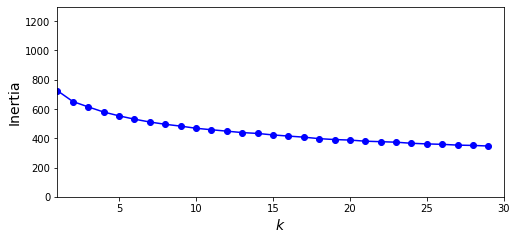

In [52]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 30, 0, 1300])
plt.show()

In [53]:
kmeans = KMeans(n_clusters=2)

In [54]:
y_pred = kmeans.fit_predict(vectorized)

In [55]:
confusion_matrix(data['Authorisation status'], y_pred)

array([[368, 746],
       [ 21,  24]], dtype=int64)

In [56]:
pca = PCA(n_components = 2)

In [58]:
X2D = pca.fit_transform(vectorized.astype('float64'))

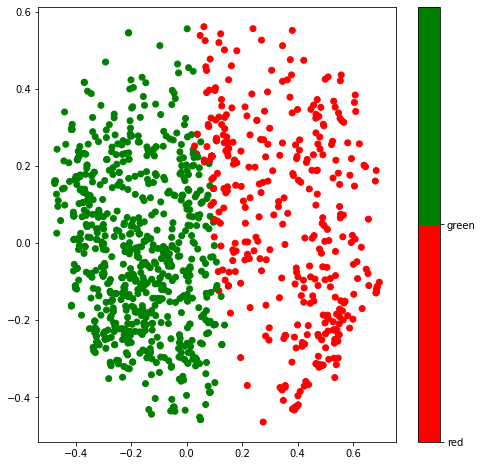

In [59]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X2D.T[0], X2D.T[1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_pred),max(y_pred)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

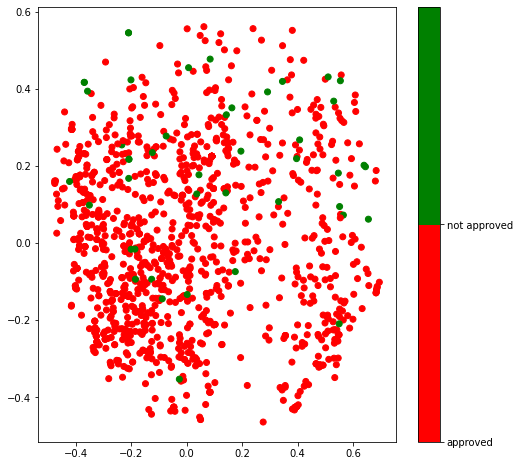

In [60]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X2D.T[0], X2D.T[1], c=data['Authorisation status'], cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_pred),max(y_pred)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(['approved', 'not approved'])

In [61]:
authorized_abstracts = data[data['Authorisation status'] == 0]['conclusions']

In [62]:
non_auth_abstracts = data[data['Authorisation status'] == 1]['conclusions']

In [84]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 5)
X = tf_idf_vectorizer.fit_transform(authorized_abstracts)
X.toarray()
auth_vocabulary = tf_idf_vectorizer.get_feature_names()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())
vectorized.head()

,95,ci,months,survival,vs
0,0.479805,0.250398,0.470596,0.000000,0.696870
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.460067,0.360146,0.225619,0.000000,0.779570
3,0.191757,0.166789,0.423174,0.862904,0.108309
4,0.460067,0.360146,0.225619,0.000000,0.779570


In [85]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 5)
X = tf_idf_vectorizer.fit_transform(non_auth_abstracts)
X.toarray()
non_auth_vocabulary = tf_idf_vectorizer.get_feature_names()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())
vectorized.head()

,disease,mg,no,use,we
0,0.000000,0.133532,0.477231,0.835154,0.238615
1,0.295502,0.343620,0.153508,0.521928,0.706138
2,0.302885,0.633970,0.377625,0.306820,0.519234
3,0.351252,0.245069,0.410556,0.465297,0.656890
4,0.137613,0.000000,0.321695,0.900746,0.257356


In [86]:
vocabulary = auth_vocabulary + non_auth_vocabulary
vocabulary

['95', 'ci', 'months', 'survival', 'vs', 'disease', 'mg', 'no', 'use', 'we']

In [87]:
tf_idf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [78]:
vectorized.head()

,95,baseline,cell,ci,cost,months,placebo,rates,survival,vs,adverse,after,combination,disease,dose,mg,no,response,use,we
0,0.137041,0.201576,0.036893,0.071475,0.173459,0.133789,0.037577,0.033211,0.00000,0.198738,0.174485,0.269323,0.775972,0.031393,0.059435,0.000000,0.346564,0.000000,0.116223,0.029538
1,0.000000,0.165054,0.000000,0.000000,0.000000,0.000000,0.738450,0.000000,0.00000,0.000000,0.000000,0.147017,0.000000,0.000000,0.292001,0.000000,0.141886,0.309818,0.428244,0.145117
2,0.137962,0.101465,0.000000,0.107933,0.069850,0.067344,0.037829,0.167171,0.00000,0.233419,0.351315,0.090377,0.718691,0.031604,0.119669,0.359749,0.261669,0.031743,0.058502,0.000000
3,0.149496,0.012216,0.167693,0.129951,0.063074,0.328383,0.000000,0.072459,0.66943,0.084311,0.095171,0.070729,0.389387,0.211187,0.162093,0.153567,0.126020,0.275173,0.052827,0.075185
4,0.137962,0.101465,0.000000,0.107933,0.069850,0.067344,0.037829,0.167171,0.00000,0.233419,0.351315,0.090377,0.718691,0.031604,0.119669,0.359749,0.261669,0.031743,0.058502,0.000000


In [88]:
pca = PCA(n_components = 2)

In [89]:
X2D = pca.fit_transform(vectorized.astype('float64'))

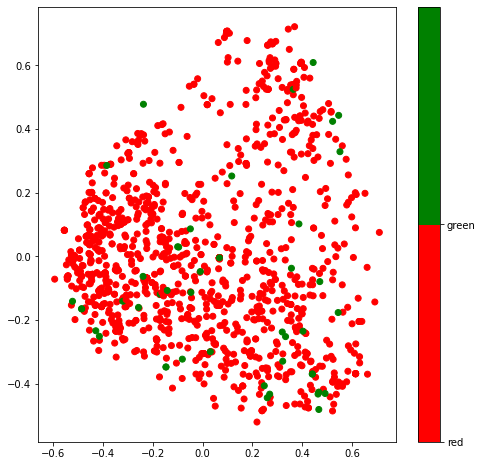

In [90]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X2D.T[0], X2D.T[1], c=data['Authorisation status'], cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_pred),max(y_pred)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

## Extended dataset

In [2]:
raw_data = pd.read_csv('../raw_data/wra_CT_PM_conclusions.csv')

In [3]:
raw_data.head()

,Unnamed: 0,Medicine name,Therapeutic area,INN,Authorisation status,Orphan medicine,First published,n_trials,status_not_yet_recruiting,status_recruiting,...,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,conclusions
0,0,DuoTrav,"Open-Angle Glaucoma, Ocular Hypertension",travoprost / timolol,0,0,2018-02-15 01:00:00,54,0,2,...,12,2,0,2,1,2,17,30,44,Travoprost/timolol group resulted in an IOP r...
1,1,Palynziq,Phenylketonurias,pegvaliase,0,1,2019-05-29 13:43:00,12,0,2,...,2,0,0,0,1,4,3,0,11,A total of 34 guidance statements were includ...
2,2,Ifirmacombi,Hypertension,irbesartan / hydrochlorothiazide,0,0,2017-12-20 12:01:00,20,0,0,...,3,0,0,2,0,0,5,12,36,The prevalence of microalbuminuria and left v...
3,3,Topotecan Hospira,"Uterine Cervical Neoplasms, Small Cell Lung Ca...",topotecan,0,0,2018-04-13 20:29:00,111,3,8,...,53,4,1,0,34,65,21,0,523,We conducted laboratory studies which found s...
4,4,CoAprovel,Hypertension,irbesartan / hydrochlorothiazide,0,0,2017-08-22 00:09:00,20,0,0,...,3,0,0,2,0,0,5,12,36,The prevalence of microalbuminuria and left v...


In [14]:
data = raw_data[['conclusions', 'Authorisation status']]

In [10]:
pm_abstracts = data['conclusions']

In [15]:
data.shape

(1363, 2)

In [98]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 50)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [99]:
len(vectorized)

1272

In [105]:
len(data[data['Authorisation status']==1])

158

In [106]:
len(data[data['Authorisation status']==0])

1114

In [107]:
kmeans = KMeans(n_clusters=2)

In [108]:
y_pred = kmeans.fit_predict(vectorized)

In [109]:
confusion_matrix(data['Authorisation status'], y_pred)

array([[363, 751],
       [ 70,  88]], dtype=int64)

In [110]:
pca = PCA(n_components = 2)

In [111]:
X2D = pca.fit_transform(vectorized.astype('float64'))

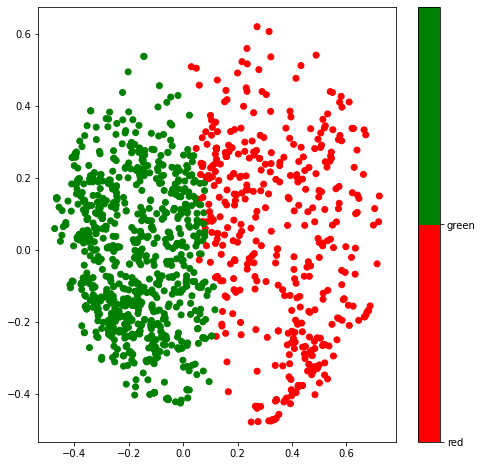

In [112]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X2D.T[0], X2D.T[1], c=y_pred, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_pred),max(y_pred)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

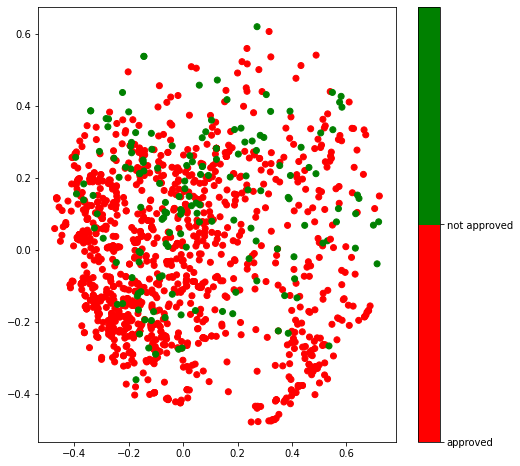

In [113]:
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(X2D.T[0], X2D.T[1], c=data['Authorisation status'], cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(y_pred),max(y_pred)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(['approved', 'not approved'])

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
clf = RandomForestClassifier(max_depth=9, random_state=0)

In [128]:
clf.fit(vectorized, data['Authorisation status'])

RandomForestClassifier(max_depth=9, random_state=0)

In [129]:
y_pred = clf.predict(vectorized)

In [130]:
confusion_matrix(data['Authorisation status'], y_pred)

array([[1114,    0],
       [  43,  115]], dtype=int64)

In [131]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    vectorized, data['Authorisation status'], test_size=0.33, random_state=42, stratify=data['Authorisation status'])

In [195]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced')

In [196]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [197]:
y_pred = clf.predict(X_test)

In [202]:
cm = confusion_matrix(y_test, y_pred)

In [199]:
f1_score(y_test, y_pred)

0.4855491329479769

In [200]:
import seaborn as sns

<AxesSubplot:>

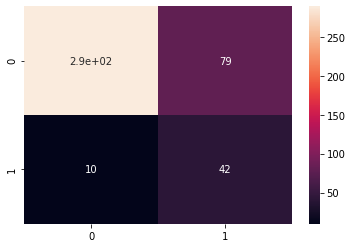

In [205]:
sns.heatmap(cm, annot=True)

In [216]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced', n_estimators=250)

In [217]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=250,
                       random_state=0)

In [218]:
y_pred = clf.predict(X_test)

In [219]:
cm = confusion_matrix(y_test, y_pred)

In [220]:
f1_score(y_test, y_pred)

0.4941176470588236

<AxesSubplot:>

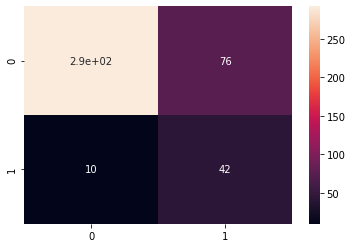

In [221]:
sns.heatmap(cm, annot=True)

In [222]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 40)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [223]:
X_train, X_test, y_train, y_test = train_test_split(
    vectorized, data['Authorisation status'], test_size=0.33, random_state=42, stratify=data['Authorisation status'])

In [224]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced')

In [225]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [226]:
y_pred = clf.predict(X_test)

In [227]:
cm = confusion_matrix(y_test, y_pred)

In [228]:
f1_score(y_test, y_pred)

0.46428571428571425

<AxesSubplot:>

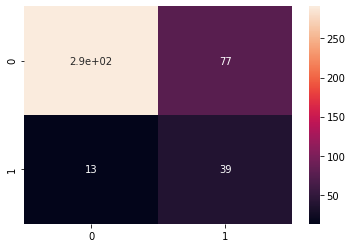

In [229]:
sns.heatmap(cm, annot=True)

0.4855491329479769


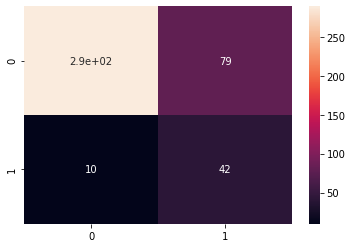

In [241]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 50)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(
    vectorized, data['Authorisation status'], test_size=0.33, random_state=42, stratify=data['Authorisation status'])
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))

0.4042553191489362


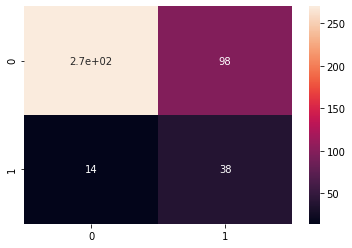

In [243]:
tf_idf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(
    vectorized, data['Authorisation status'], test_size=0.33, random_state=42, stratify=data['Authorisation status'])
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))

In [244]:
authorized_abstracts = raw_data[raw_data['Authorisation status'] == 0]['conclusions']

In [246]:
non_auth_abstracts = raw_data[raw_data['Authorisation status'] == 1]['conclusions']

In [248]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 25)
X = tf_idf_vectorizer.fit_transform(authorized_abstracts.dropna())
X.toarray()
auth_vocabulary = tf_idf_vectorizer.get_feature_names()
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 25)
X = tf_idf_vectorizer.fit_transform(non_auth_abstracts.dropna())
X.toarray()
non_auth_vocabulary = tf_idf_vectorizer.get_feature_names()
vocabulary = auth_vocabulary + non_auth_vocabulary

0.4855491329479769


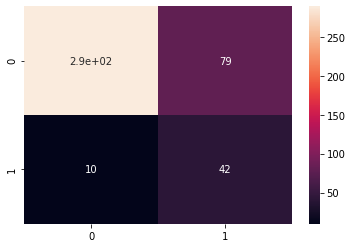

In [262]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 50, ngram_range=(1, 1))
X = tf_idf_vectorizer.fit_transform(pm_abstracts)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(
    vectorized, data['Authorisation status'], test_size=0.33, random_state=42, stratify=data['Authorisation status'])
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))

In [271]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [297]:
ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2, class_weight='balanced'), n_estimators=100,
        algorithm='SAMME.R', learning_rate=0.1

)

In [298]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=2),
                   learning_rate=0.1, n_estimators=100)

0.43103448275862066


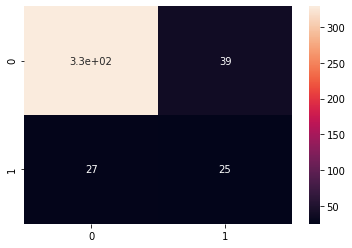

In [299]:
y_pred = ada_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))

In [300]:
from sklearn.ensemble import GradientBoostingClassifier

In [303]:
gb_clf = GradientBoostingClassifier(max_depth=2)

In [305]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2)

In [306]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2)

0.1791044776119403


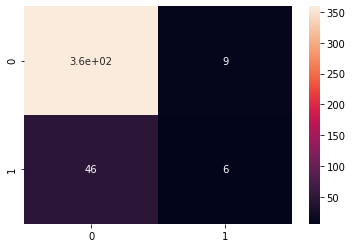

In [307]:
y_pred = gb_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))

In [308]:
import xgboost

In [309]:
xgb_clf = xgboost.XGBClassifier()

In [310]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.32


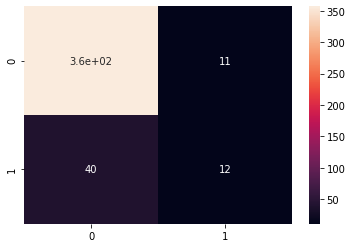

In [311]:
y_pred = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))

In [5]:
def get_numericals(df):
    df['therapeutic_number'] = df['Therapeutic area'].apply(lambda x: x.count(',') + 1)
    df = df.select_dtypes(exclude='object')
    return df

In [6]:
numericals = get_numericals(raw_data)

In [8]:
numericals.shape

(1363, 28)

In [19]:
numericals.shape

(1363, 28)

In [41]:
numericals.columns

Index(['Unnamed: 0', 'Authorisation status', 'Orphan medicine', 'n_trials',
       'status_not_yet_recruiting', 'status_recruiting',
       'status_enrolling_by_invitation', 'status_active_not_recruiting',
       'status_suspended', 'status_terminated', 'status_completed',
       'status_withdrawn', 'status_unknown', 'org_fed', 'org_indiv',
       'org_industry', 'org_network', 'org_nih', 'org_other', 'org_other_gov',
       'phase_early_1', 'phase_not_applicable', 'phase_1', 'phase_2',
       'phase_3', 'phase_4', 'pm_results', 'therapeutic_number'],
      dtype='object')

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

top_columns= ['org_industry',  'n_trials',  'phase_4',
             'org_other', 'status_completed', 'status_recruiting',
             'phase_3',  'pm_results',
             'phase_2','Authorisation status']


percent_list= ['status_not_yet_recruiting', 'status_recruiting',
       'status_enrolling_by_invitation', 'status_active_not_recruiting',
       'status_suspended', 'status_terminated', 'status_completed',
       'status_withdrawn', 'status_unknown', 'org_fed', 'org_indiv',
       'org_industry', 'org_network', 'org_nih', 'org_other', 'org_other_gov',
       'phase_early_1', 'phase_not_applicable', 'phase_1', 'phase_2',
       'phase_3', 'phase_4', 'pm_results'] 

def percentage_columns(df,column_list):
    print(df['n_trials'].head())
    for column in column_list:
        df[column]=((df[column]*100)/df['n_trials']).replace([np.inf, -np.inf, np.nan], 0)
    return df

percent=FunctionTransformer(lambda df_numerical: percentage_columns(df_numerical, percent_list))

preprocessing= ColumnTransformer([
    ('percentage_transformation', percent, percent_list),
    ('scaler', MinMaxScaler(), percent_list)])


In [57]:
percentage_columns(numericals, percent_list)

0     54
1     12
2     20
3    111
4     20
Name: n_trials, dtype: int64


c:\users\pedro\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,Authorisation status,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,...,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,therapeutic_number
0,0,0,0,54,0.000000,3.703704,0.000000,1.851852,0.000000,5.555556,...,22.222222,3.703704,0.000000,3.703704,1.851852,3.703704,31.481481,55.555556,81.481481,2
1,1,0,1,12,0.000000,16.666667,0.000000,8.333333,0.000000,0.000000,...,16.666667,0.000000,0.000000,0.000000,8.333333,33.333333,25.000000,0.000000,91.666667,1
2,2,0,0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.000000,0.000000,10.000000,0.000000,0.000000,25.000000,60.000000,180.000000,1
3,3,0,0,111,2.702703,7.207207,0.000000,6.306306,0.000000,10.810811,...,47.747748,3.603604,0.900901,0.000000,30.630631,58.558559,18.918919,0.000000,471.171171,2
4,4,0,0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.000000,0.000000,10.000000,0.000000,0.000000,25.000000,60.000000,180.000000,1
5,5,0,0,36,16.666667,30.555556,0.000000,5.555556,0.000000,0.000000,...,38.888889,0.000000,2.777778,13.888889,5.555556,30.555556,33.333333,11.111111,147.222222,1
6,6,0,0,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.090909,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,90.909091,1
7,7,0,0,132,0.757576,7.575758,0.000000,7.575758,0.000000,3.030303,...,52.272727,1.515152,0.000000,9.848485,8.333333,25.757576,20.454545,25.757576,1066.666667,1
8,8,0,0,61,1.639344,1.639344,0.000000,3.278689,0.000000,8.196721,...,29.508197,1.639344,0.000000,13.114754,1.639344,18.032787,34.426230,27.868852,1288.524590,2
9,9,0,0,618,1.779935,11.650485,0.323625,5.177994,0.161812,6.634304,...,38.834951,0.809061,0.161812,5.825243,3.074434,11.165049,28.640777,19.902913,952.912621,9


In [60]:
numericals = numericals.drop(labels=['Unnamed: 0', 'Authorisation status'], axis=1)

In [61]:
numericals.head()

,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,status_completed,status_withdrawn,...,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,therapeutic_number
0,0,54,0.000000,3.703704,0.0,1.851852,0.0,5.555556,79.629630,5.555556,...,22.222222,3.703704,0.000000,3.703704,1.851852,3.703704,31.481481,55.555556,81.481481,2
1,1,12,0.000000,16.666667,0.0,8.333333,0.0,0.000000,75.000000,0.000000,...,16.666667,0.000000,0.000000,0.000000,8.333333,33.333333,25.000000,0.000000,91.666667,1
2,0,20,0.000000,0.000000,0.0,0.000000,0.0,0.000000,90.000000,10.000000,...,15.000000,0.000000,0.000000,10.000000,0.000000,0.000000,25.000000,60.000000,180.000000,1
3,0,111,2.702703,7.207207,0.0,6.306306,0.0,10.810811,57.657658,2.702703,...,47.747748,3.603604,0.900901,0.000000,30.630631,58.558559,18.918919,0.000000,471.171171,2
4,0,20,0.000000,0.000000,0.0,0.000000,0.0,0.000000,90.000000,10.000000,...,15.000000,0.000000,0.000000,10.000000,0.000000,0.000000,25.000000,60.000000,180.000000,1


In [62]:
scaler = MinMaxScaler()

In [87]:
scaled_numericals = pd.DataFrame()

In [93]:
columns_names = numericals.columns.to_list()
columns_names

['Orphan medicine',
 'n_trials',
 'status_not_yet_recruiting',
 'status_recruiting',
 'status_enrolling_by_invitation',
 'status_active_not_recruiting',
 'status_suspended',
 'status_terminated',
 'status_completed',
 'status_withdrawn',
 'status_unknown',
 'org_fed',
 'org_indiv',
 'org_industry',
 'org_network',
 'org_nih',
 'org_other',
 'org_other_gov',
 'phase_early_1',
 'phase_not_applicable',
 'phase_1',
 'phase_2',
 'phase_3',
 'phase_4',
 'pm_results',
 'therapeutic_number']

In [96]:
scaled_array = scaler.fit_transform(numericals[columns_names])

In [98]:
scaled_numericals = pd.DataFrame(scaled_array, columns=columns_names)

In [100]:
data = raw_data[['conclusions', 'Authorisation status']]

In [104]:
merged = pd.merge(data, scaled_numericals, left_index=True, right_index=True)

In [105]:
merged.head()

,conclusions,Authorisation status,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,...,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,therapeutic_number
0,Travoprost/timolol group resulted in an IOP r...,0,0.0,0.006591,0.000000,0.037037,0.0,0.018519,0.0,0.055556,...,0.222222,0.092593,0.000000,0.037037,0.018519,0.037037,0.314815,0.555556,0.002685,0.125
1,A total of 34 guidance statements were includ...,0,1.0,0.001465,0.000000,0.166667,0.0,0.083333,0.0,0.000000,...,0.166667,0.000000,0.000000,0.000000,0.083333,0.333333,0.250000,0.000000,0.003021,0.000
2,The prevalence of microalbuminuria and left v...,0,0.0,0.002441,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.150000,0.000000,0.000000,0.100000,0.000000,0.000000,0.250000,0.600000,0.005932,0.000
3,We conducted laboratory studies which found s...,0,0.0,0.013548,0.054054,0.072072,0.0,0.063063,0.0,0.108108,...,0.477477,0.090090,0.022523,0.000000,0.306306,0.585586,0.189189,0.000000,0.015527,0.125
4,The prevalence of microalbuminuria and left v...,0,0.0,0.002441,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.150000,0.000000,0.000000,0.100000,0.000000,0.000000,0.250000,0.600000,0.005932,0.000


In [106]:
merged_clean = merged.dropna()

In [107]:
merged_clean.shape

(1272, 28)

In [108]:
conclusions = merged_clean['conclusions']

In [109]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 50, ngram_range=(1, 1))
X = tf_idf_vectorizer.fit_transform(conclusions)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [113]:
vectorized.shape

(1272, 50)

In [115]:
vectorized.head()

,001,24,95,activity,among,anti,baseline,benefit,better,cell,...,safe,severe,survival,symptoms,type,using,versus,vs,weeks,years
0,0.194461,0.240765,0.124282,0.0000,0.059270,0.031431,0.183094,0.028786,0.229921,0.032930,...,0.057388,0.000000,0.000000,0.032902,0.000000,0.057434,0.122162,0.180721,0.126139,0.000000
1,0.000000,0.131977,0.000000,0.0000,0.000000,0.137832,0.133819,0.126236,0.000000,0.000000,...,0.125831,0.000000,0.000000,0.144284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.148198,0.137614,0.189430,0.0000,0.045169,0.000000,0.139535,0.087752,0.000000,0.000000,...,0.043735,0.271016,0.000000,0.000000,0.097008,0.043770,0.046550,0.321361,0.000000,0.088747
3,0.014313,0.026582,0.164661,0.1887,0.026175,0.020821,0.013477,0.063565,0.038078,0.181784,...,0.038016,0.052351,0.721144,0.014531,0.000000,0.057071,0.033719,0.093114,0.027853,0.006429
4,0.148198,0.137614,0.189430,0.0000,0.045169,0.000000,0.139535,0.087752,0.000000,0.000000,...,0.043735,0.271016,0.000000,0.000000,0.097008,0.043770,0.046550,0.321361,0.000000,0.088747


In [116]:
merged_clean.head()

,conclusions,Authorisation status,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,...,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,therapeutic_number
0,Travoprost/timolol group resulted in an IOP r...,0,0.0,0.006591,0.000000,0.037037,0.0,0.018519,0.0,0.055556,...,0.222222,0.092593,0.000000,0.037037,0.018519,0.037037,0.314815,0.555556,0.002685,0.125
1,A total of 34 guidance statements were includ...,0,1.0,0.001465,0.000000,0.166667,0.0,0.083333,0.0,0.000000,...,0.166667,0.000000,0.000000,0.000000,0.083333,0.333333,0.250000,0.000000,0.003021,0.000
2,The prevalence of microalbuminuria and left v...,0,0.0,0.002441,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.150000,0.000000,0.000000,0.100000,0.000000,0.000000,0.250000,0.600000,0.005932,0.000
3,We conducted laboratory studies which found s...,0,0.0,0.013548,0.054054,0.072072,0.0,0.063063,0.0,0.108108,...,0.477477,0.090090,0.022523,0.000000,0.306306,0.585586,0.189189,0.000000,0.015527,0.125
4,The prevalence of microalbuminuria and left v...,0,0.0,0.002441,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.150000,0.000000,0.000000,0.100000,0.000000,0.000000,0.250000,0.600000,0.005932,0.000


In [135]:
clean_numericals = merged_clean.drop(labels=['conclusions'], axis=1).dropna()

In [136]:
clean_numericals.shape

(1272, 27)

In [137]:
X = clean_numericals.join(vectorized)

In [138]:
X.shape

(1272, 77)

In [140]:
X = X.dropna()

In [141]:
y = X['Authorisation status'].astype('int64')

In [142]:
X = X.drop(labels=['Authorisation status'], axis=1)

In [143]:
X.shape

(1200, 76)

In [144]:
y.shape

(1200,)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

0.3764705882352941


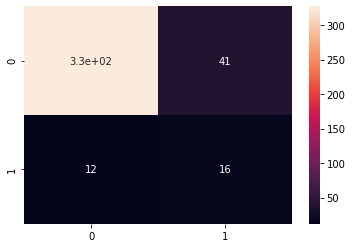

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1, stratify=y)
clf = RandomForestClassifier(max_depth=3, random_state=1, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))

In [162]:
X.columns

Index(['Orphan medicine', 'n_trials', 'status_not_yet_recruiting',
       'status_recruiting', 'status_enrolling_by_invitation',
       'status_active_not_recruiting', 'status_suspended', 'status_terminated',
       'status_completed', 'status_withdrawn', 'status_unknown', 'org_fed',
       'org_indiv', 'org_industry', 'org_network', 'org_nih', 'org_other',
       'org_other_gov', 'phase_early_1', 'phase_not_applicable', 'phase_1',
       'phase_2', 'phase_3', 'phase_4', 'pm_results', 'therapeutic_number',
       '001', '24', '95', 'activity', 'among', 'anti', 'baseline', 'benefit',
       'better', 'cell', 'cells', 'ci', 'control', 'cost', 'daily', 'day',
       'did', 'differences', 'early', 'findings', 'function', 'greater',
       'groups', 'improvement', 'incidence', 'increase', 'inhibitors',
       'levels', 'lower', 'mean', 'mg', 'months', 'outcomes', 'placebo',
       'rates', 'reduced', 'reduction', 'regimen', 'resistance',
       'respectively', 'safe', 'severe', 'survival', 

In [163]:
merged.shape

(1363, 28)

In [171]:
merged_filled = merged.fillna('')

In [172]:
conclusions = merged_filled['conclusions']

In [173]:
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, min_df=0.5, max_features = 50, ngram_range=(1, 1))
X = tf_idf_vectorizer.fit_transform(conclusions)
X.toarray()
vectorized = pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [177]:
clean_numericals = merged_filled.drop(labels=['conclusions'], axis=1)

In [178]:
X = clean_numericals.join(vectorized)

In [179]:
X.shape

(1363, 77)

In [180]:
y = X['Authorisation status'].astype('int64')

In [181]:
X = X.drop(labels=['Authorisation status'], axis=1)

In [183]:
X.shape

(1363, 76)

0.5535714285714285


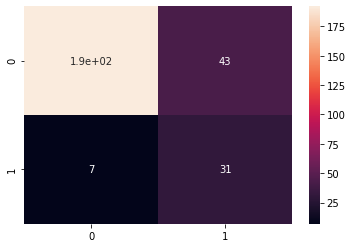

In [185]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)
clf = RandomForestClassifier(max_depth=3, random_state=1, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))

0.43333333333333335


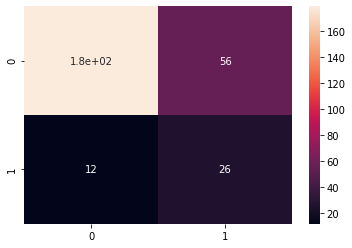

In [186]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=41, stratify=y)
clf = RandomForestClassifier(max_depth=3, random_state=23, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f1_score(y_test, y_pred))